# Make Imports

In [21]:
import psycopg2 as psg
import psycopg2.extras

from datetime import datetime, timezone

import os
import random
from time import sleep

from tqdm import notebook
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# !pip3 install psycopg2 tqdm pandas python-decouple matplotlib

# Declare Connection Credentials

In [8]:
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')

DB_HOST = '10.0.2.15'
DB_NAME = 'docker_pmu'
DB_PORT = '5433'

In [9]:
conn = psg.connect(dbname=DB_NAME, user=DB_USER, password=DB_PASS, host=DB_HOST, port=DB_PORT)

# Test Connection: Request first 5 entries

In [10]:
with conn.cursor(cursor_factory=psycopg2.extras.DictCursor) as cur:
    query = "SELECT * FROM docker_pmu_data limit 5" 
    cur.execute(query)
    response = cur.fetchall()
conn.commit()

In [11]:
response

[[datetime.datetime(2012, 1, 3, 1, 0), 78807.3672, 9.3185],
 [datetime.datetime(2012, 1, 3, 1, 0, 0, 33000), 78797.2422, 9.5815],
 [datetime.datetime(2012, 1, 3, 1, 0, 0, 67000), 78813.2344, 9.8433],
 [datetime.datetime(2012, 1, 3, 1, 0, 0, 100000), 78827.4766, 10.1013],
 [datetime.datetime(2012, 1, 3, 1, 0, 0, 133000), 78825.7813, 10.3589]]

## Optional: Insert Data to Database

In [12]:
url = 'https://raw.githubusercontent.com/Awsaf780/phasor-dataset/main/Dataset/120103%2C010000000%2CUT%2CAustin%2C3378%2CPhasor.csv'
df = pd.read_csv(url, parse_dates=['Timestamp'])

In [13]:
df.head()

,Timestamp,Austin_V1LPM_Magnitude,Austin_V1LPM_Angle,HARRIS_V1LPM_Magnitude,HARRIS_V1LPM_Angle,McDonald 1P_V1LPM_Magnitude,McDonald 1P_V1LPM_Angle,UT 3 phase_VALPM_Magnitude,UT 3 phase_VALPM_Angle,UT Pan Am_V1LPM_Magnitude,UT Pan Am_V1LPM_Angle,WACO_V1YPM_Magnitude,WACO_V1YPM_Angle,Z_UT_3378_AO[079]_Value,Z_UT_3378_AO[085]_Value,Z_UT_3378_AO[087]_Value,Z_UT_3378_AO[090]_Value,Z_UT_3378_AO[091]_Value,Z_UT_3378_AO[092]_Value
0,2012-01-03 01:00:00.000,78807.3672,9.3185,66912.8516,-79.9051,41.2308,-31.3753,118.4018,9.3404,80324.0000,121.1634,41265.9375,70.8917,60.0218,60.0221,60.0220,60.0219,60.0231,60.022
1,2012-01-03 01:00:00.033,78797.2422,9.5815,66910.4219,-79.6457,41.2330,-31.0980,118.3900,9.6025,80328.6094,121.4295,41265.6367,71.1470,60.0218,60.0220,60.0222,60.0217,60.0228,60.022
2,2012-01-03 01:00:00.067,78813.2344,9.8433,66908.6328,-79.3879,41.2291,-30.8415,118.4051,9.8653,80334.7031,121.7138,41264.6875,71.4083,60.0217,60.0218,60.0224,60.0217,60.0227,60.022
3,2012-01-03 01:00:00.100,78827.4766,10.1013,66906.4531,-79.1299,41.2306,-30.5959,118.4203,10.1244,80337.0078,121.9887,41261.6992,71.6615,60.0217,60.0217,60.0223,60.0218,60.0224,60.022
4,2012-01-03 01:00:00.133,78825.7813,10.3589,66905.2656,-78.8716,41.2362,-30.3329,118.4185,10.3815,80340.4375,122.2511,41249.3906,71.9169,60.0217,60.0215,60.0220,60.0217,60.0223,60.021


In [14]:
columns = ['Timestamp', 'Austin_V1LPM_Magnitude', 'Austin_V1LPM_Angle']
df = df[columns]

In [17]:
# for index,data in notebook.tqdm(df.iterrows()):
#     cur = conn.cursor()
#     dt = data['Timestamp']
#     magnitude = data['Austin_V1LPM_Magnitude']
#     angle = data['Austin_V1LPM_Angle']

#     query = "INSERT INTO docker_pmu_data VALUES ('{}',{}, {});".format(dt, magnitude, angle)

#     cur.execute(query)
#     conn.commit()
#     cur.close()
    
# print('All rows of DataFrame Inserted')

0it [00:00, ?it/s]

All rows of DataFrame Inserted


# Plot Real-time Query 

Since all possible timestamps are not represented in the data, we only query the available timestamps.

In [18]:
timestamps = df['Timestamp'].tolist()

Query first 10000 indexes for faster run

In [19]:
responses = []
for time in notebook.tqdm(timestamps[:10000]):
    with conn.cursor(cursor_factory=psycopg2.extras.DictCursor) as cur:
        query = "SELECT * FROM docker_pmu_data where timestamp='{}'".format(time) 
        cur.execute(query)
        response = cur.fetchone()
        responses.append(response)
        conn.commit()

  0%|          | 0/10000 [00:00<?, ?it/s]

Setup Dynamic Plot

In [22]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


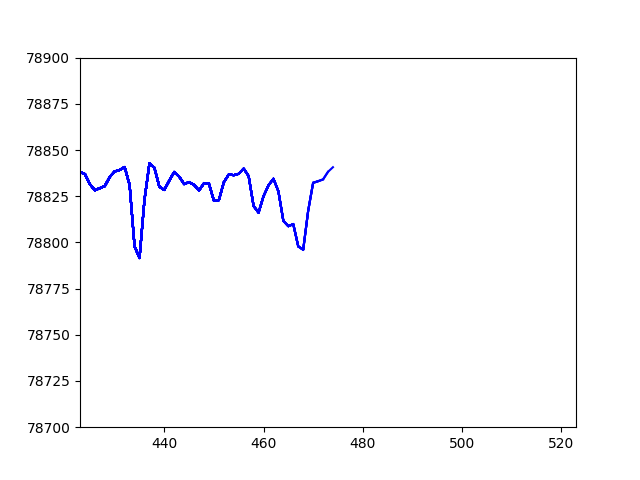

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

i = 0
x,y = [], []

while True:
    x.append(i)
    y.append(responses[i][1])
    
    ax.plot(x,y,color='b')
    
    fig.canvas.draw()
    
    ax.set_xlim(left=i-50, right=i+50)
    ax.set_ylim(78700, 78900)
    i+=1
    sleep(0.1)

plt.close()

Close Connection

In [ ]:
cur.close()
conn.commit()